## Simple Linear Regression
Exploring linear regression with one feature.
The dataset has been downloaded from: https://www.kaggle.com/datasets/andonians/random-linear-regression. It contains two folders with the training and test set for linear regression. Partially based on Course 1 of the Machine Learning Specialization 

### Exploring the data

In [1]:
import os
import pandas as pd
import csv

In [2]:
cwd = os.getcwd()

# data used to train the model
trainingSet = os.path.join(cwd, 'SimpleLinearRegression/train.csv') 

# data used to test the model
testSet = os.path.join(cwd, 'SimpleLinearRegression/test.csv')

dfTest = pd.read_csv(trainingSet)
print(dfTest.shape)

dfTrain = pd.read_csv(testSet)
print(dfTrain.shape)

dfTest, dfTrain

(700, 2)
(300, 2)


(        x          y
 0    24.0  21.549452
 1    50.0  47.464463
 2    15.0  17.218656
 3    38.0  36.586398
 4    87.0  87.288984
 ..    ...        ...
 695  58.0  58.595006
 696  93.0  94.625094
 697  82.0  88.603770
 698  66.0  63.648685
 699  97.0  94.975266
 
 [700 rows x 2 columns],
       x          y
 0    77  79.775152
 1    21  23.177279
 2    22  25.609262
 3    20  17.857388
 4    36  41.849864
 ..   ..        ...
 295  71  68.545888
 296  46  47.334876
 297  55  54.090637
 298  62  63.297171
 299  47  52.459467
 
 [300 rows x 2 columns])

In [3]:
dfTest.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
# checking for null values
dfTest.isna().sum()

# removing null values
dfTest = dfTest.dropna(subset=['y'],axis=0)

### Plotting the data

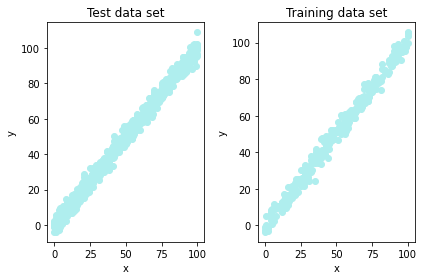

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# plotting with pandas only
#dfTest.plot(x ='x', y='y', kind = 'scatter')
#dfTrain.plot(x='x', y='y', kind = 'scatter')

# scatter plots with plt

plt.subplot(1, 2, 1)
plt.scatter(dfTest['x'], dfTest['y'], c='paleturquoise')
plt.title("Test data set")
plt.ylabel('y')
plt.xlabel('x')

plt.subplot(1, 2, 2)
plt.scatter(dfTrain['x'], dfTrain['y'], c='paleturquoise')
plt.title("Training data set")
plt.ylabel('y')
plt.xlabel('x')

plt.tight_layout()
plt.show()

In [6]:
# transforming DataSeries into numpy arrays 

x_train = dfTrain['x'].to_numpy()
y_train = dfTrain['y'].to_numpy()
x_test = dfTest['x'].to_numpy()
y_test = dfTest['x'].to_numpy()


### Implementing cost function
For our model $f_{w,b}$(x) = w*x + b we want to find a value for the parameters w,b that result in a very small cost function J(w,b).

In [7]:
def cost_function(w,b, x_train, y_train):
    '''
    Computes the cost of the hypothesis function with the parameters w and b.
    Args: 
        w, b (scalars): model parameters
        x_train (ndarray (m,)): training data, m examples
        y_train (ndarray (m,)): training data, m examples
    Returns
        cost (float): The cost of the hypothesis function
      
    '''
    m = x_train.shape[0]
    cost = 0
    for i in range(m):
        fwb_xi = w* x_train[i] + b
        loss = (fwb_xi - y_train[i])**2
        cost += loss
    cost = cost/(2*m)
    return cost

In [8]:
print(cost_function(1,0,x_train,y_train))
print(cost_function(1,0.5,x_train,y_train))

4.701365516566364
4.692173300761365


In [9]:
# plot regression line and x_train,y_train values 

def predicted_y(w,b,x_train):
    '''
    Computes the predicted y values of a hypothesis function or model.
    Args: 
        x_train (ndarray (m,)): training data, m examples 
        w, b (scalars): model parameters
    Returns
        pred_y (ndarray): The values of y predicted by the model fbx(xi) = w*xi + b
    '''
    m = x_train.shape[0]
    pred_y = list()
    for i in range(m):
        fbx_xi = w*x_train[i] + b
        pred_y.append(fbx_xi)
    pred_y = np.array(pred_y)
    return pred_y

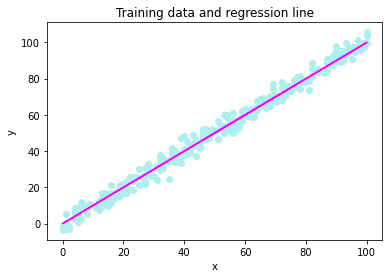

In [10]:
pred_y = predicted_y(1,0,x_train)

plt.scatter(x_train, y_train, c='paleturquoise')
plt.plot(x_train, pred_y, c='fuchsia')
plt.title("Training data and regression line")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

### Implementing gradient descent (batch or vanilla gradient descent)

In [11]:
# compute derivatives
def compute_derivatives(w,b,x_train,y_train):
    '''
    Computes the partial derivatives of the cost function with respect to w,b.
    Args:
        w, b (scalars): model parameters
        x_train (ndarray (m,)): training data, m examples
        y_train (ndarray (m,)): training data, m examples
    Returns
        dw (float): partial derivative with respect to w
        db (float): partial derivative with respect to b

    '''
    m = x_train.shape[0]
    dw = 0
    db = 0
    for i in range(m):
        fwb_xi = w*x_train[i] + b
        dw_i = (fwb_xi - y_train[i]) * x_train[i]
        db_i = (fwb_xi - y_train[i])
        dw += dw_i
        db += db_i
    dw = (1/m) * dw
    db = (1/m) * db
    return dw, db

# gradient descent
def gradient_descent(w,b,x_train,y_train,alpha,n_iter, cost_function, compute_derivatives):
    '''
    Performs gradient descent to fit w,b. 
    Args:
        w, b (scalars): initial values of model parameters
        x_train (ndarray (m,)): training data, m examples
        y_train (ndarray (m,)): target values, m examples
        alpha (float): learning rate
        n_iter (int): number of iterations to run gradient descent
        cost_function (function): function to compute the cost of the hypothesis function
        compute_derivatives (function): function to compute derivatives (gradient)
    Returns
        w, b (scalar): updated and final parameters for w, b 
        costs (list of floats): costs for all w and b (for plotting)
        iterations (list of ints): all iterations from 1 to n (for plotting)
    '''


    # list of costs at certain iterations (for plotting)
    costs = []
    iterations = list(range(1,n_iter+1))
    
    for i in range(n_iter):
        # simultaneously update w and b until convergence
        tmp_w = w - alpha* compute_derivatives(w,b,x_train,y_train)[0]
        tmp_b = b - alpha* compute_derivatives(w,b,x_train,y_train)[1]
        w = tmp_w
        b = tmp_b
        costs.append(cost_function(w,b, x_train, y_train))
        
    return w, b, costs, iterations

In [12]:
w_final, b_final, costs, iterations = gradient_descent(0,0,x_train,y_train, 0.0001, 1000, cost_function,compute_derivatives)
print(f"Parameters found by gradient descent: w={w_final} and b={b_final}!")

Parameters found by gradient descent: w=1.0073672985218645 and b=0.003863730635833524!


## make sure it works properly

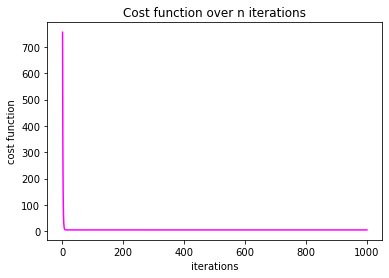

In [13]:
plt.plot(iterations, costs, c='fuchsia')
plt.title("Cost function over n iterations")
plt.ylabel('cost function')
plt.xlabel('iterations')
plt.show()

### the learning rate obviously is too high, let's decrease it

Parameters found by gradient descent: w=0.29071149581324596 and b=0.004338678182377295!


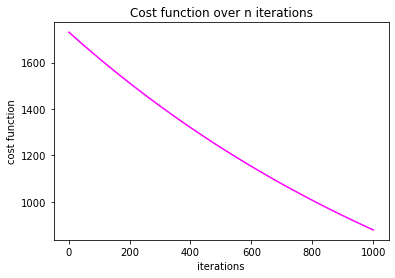

In [14]:
w_final, b_final, costs, iterations = gradient_descent(0,0,x_train,y_train, 0.0000001, 1000, cost_function,compute_derivatives)
print(f"Parameters found by gradient descent: w={w_final} and b={b_final}!")

plt.plot(iterations, costs, c='fuchsia')
plt.title("Cost function over n iterations")
plt.ylabel('cost function')
plt.xlabel('iterations')
plt.show()

### learning rate is too low, let's increase it

Parameters found by gradient descent: w=0.9739522393419257 and b=0.014460178658334419!


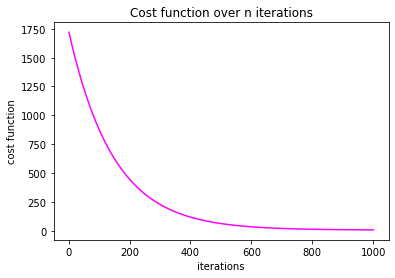

In [15]:
w_final, b_final, costs, iterations = gradient_descent(0,0,x_train,y_train, 0.000001, 1000, cost_function,compute_derivatives)
print(f"Parameters found by gradient descent: w={w_final} and b={b_final}!")

plt.plot(iterations, costs, c='fuchsia')
plt.title("Cost function over n iterations")
plt.ylabel('cost function')
plt.xlabel('iterations')
plt.show()

### looks better! 

### Comparison with scikit-learn
Code based on: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py.

[-0.46181077]
Coefficients: 
 [[1.01433536]]
Mean squared error: 0.24
Coefficient of determination: 1.00


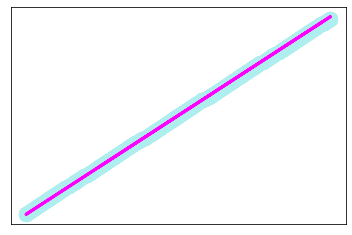

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets

regr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Make predictions using the testing set
y_pred = regr.predict(x_test.reshape(-1, 1))

# interception
print(regr.intercept_)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color="paleturquoise", s=200)
plt.plot(x_test, y_pred, color="fuchsia", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()